In [2]:
# ====================================================================
#  第一步：环境准备与依赖库安装
#  请运行此单元格以确保所有必需的库都已安装。
# ====================================================================

import sys
import subprocess

# 定义需要的库列表
required_packages = [
    'pandas',
    'numpy',
    'matplotlib',
    'seaborn',
    'scikit-learn',
    'folium'
]

# 检查并安装缺失的库
print("开始检查并安装依赖库...")
for package in required_packages:
    try:
        # 尝试导入库
        __import__(package)
        print(f"✅ {package} 已安装。")
    except ImportError:
        # 如果导入失败，则进行安装
        print(f"⚠️ {package} 未找到，正在尝试安装...")
        try:
            subprocess.check_call([sys.executable, "-m", "pip", "install", package])
            print(f"✅ {package} 安装成功！")
        except subprocess.CalledProcessError as e:
            print(f"❌ 安装 {package} 失败: {e}")
            print("请手动在终端运行 'pip install {}' 进行安装。".format(package))
            
print("\n🎉 环境准备完成！可以开始运行后续代码了。")


开始检查并安装依赖库...
✅ pandas 已安装。
✅ numpy 已安装。
✅ matplotlib 已安装。
✅ seaborn 已安装。
⚠️ scikit-learn 未找到，正在尝试安装...
✅ scikit-learn 安装成功！
⚠️ folium 未找到，正在尝试安装...
✅ folium 安装成功！

🎉 环境准备完成！可以开始运行后续代码了。


数据加载成功！
完整数据集形状: (20000, 41)
建模数据集形状: (20000, 32)

--- 2.1 核心变量分布分析 ---


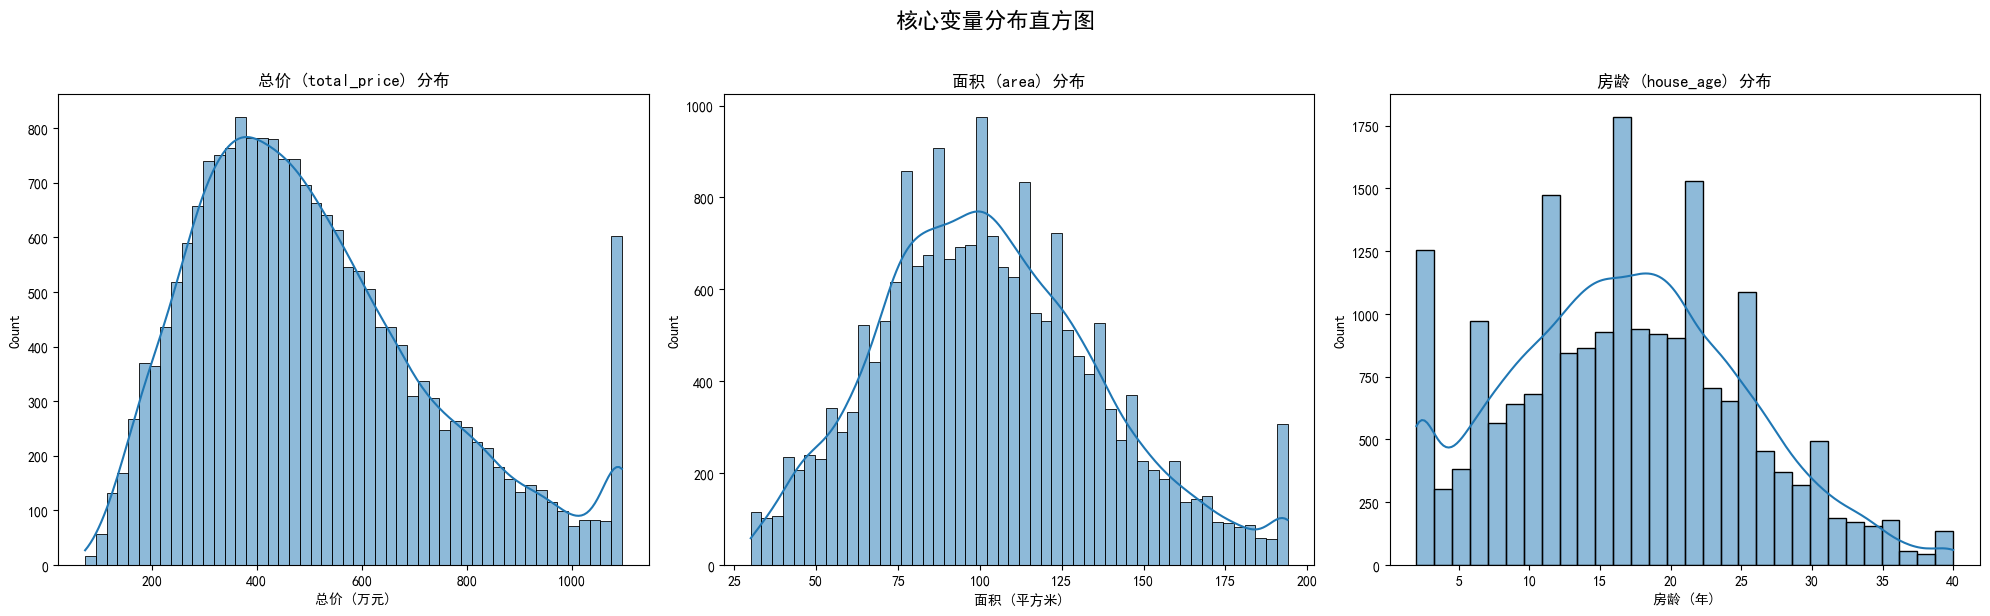


--- 2.2 地理位置对房价的影响 ---


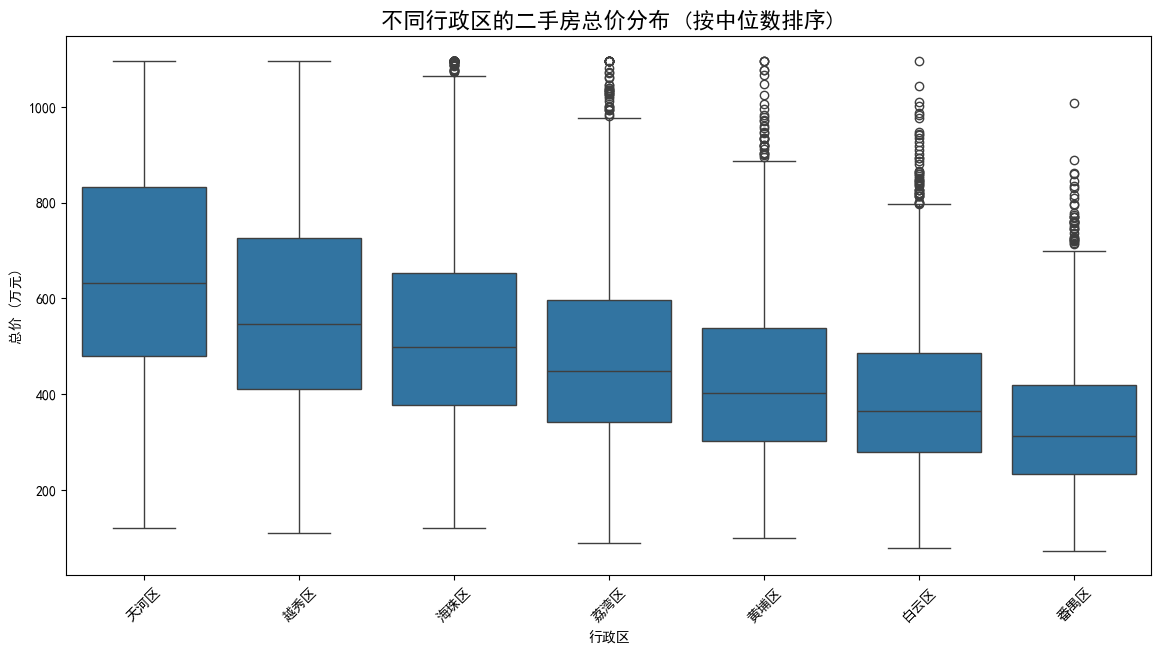


--- 2.3.1 建筑面积 vs. 总价 ---


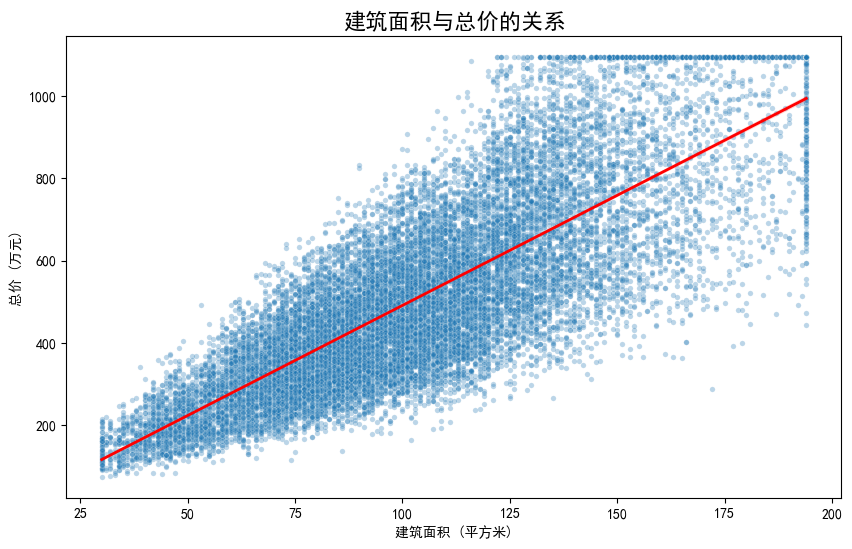


--- 2.3.2 房龄 vs. 总价 ---


<Figure size 1000x600 with 0 Axes>

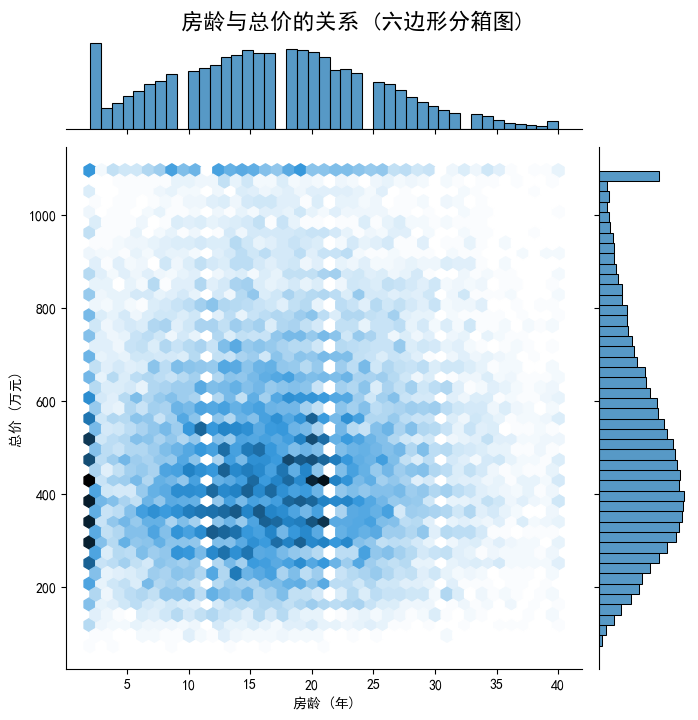


--- 2.3.3 其他属性分析 ---


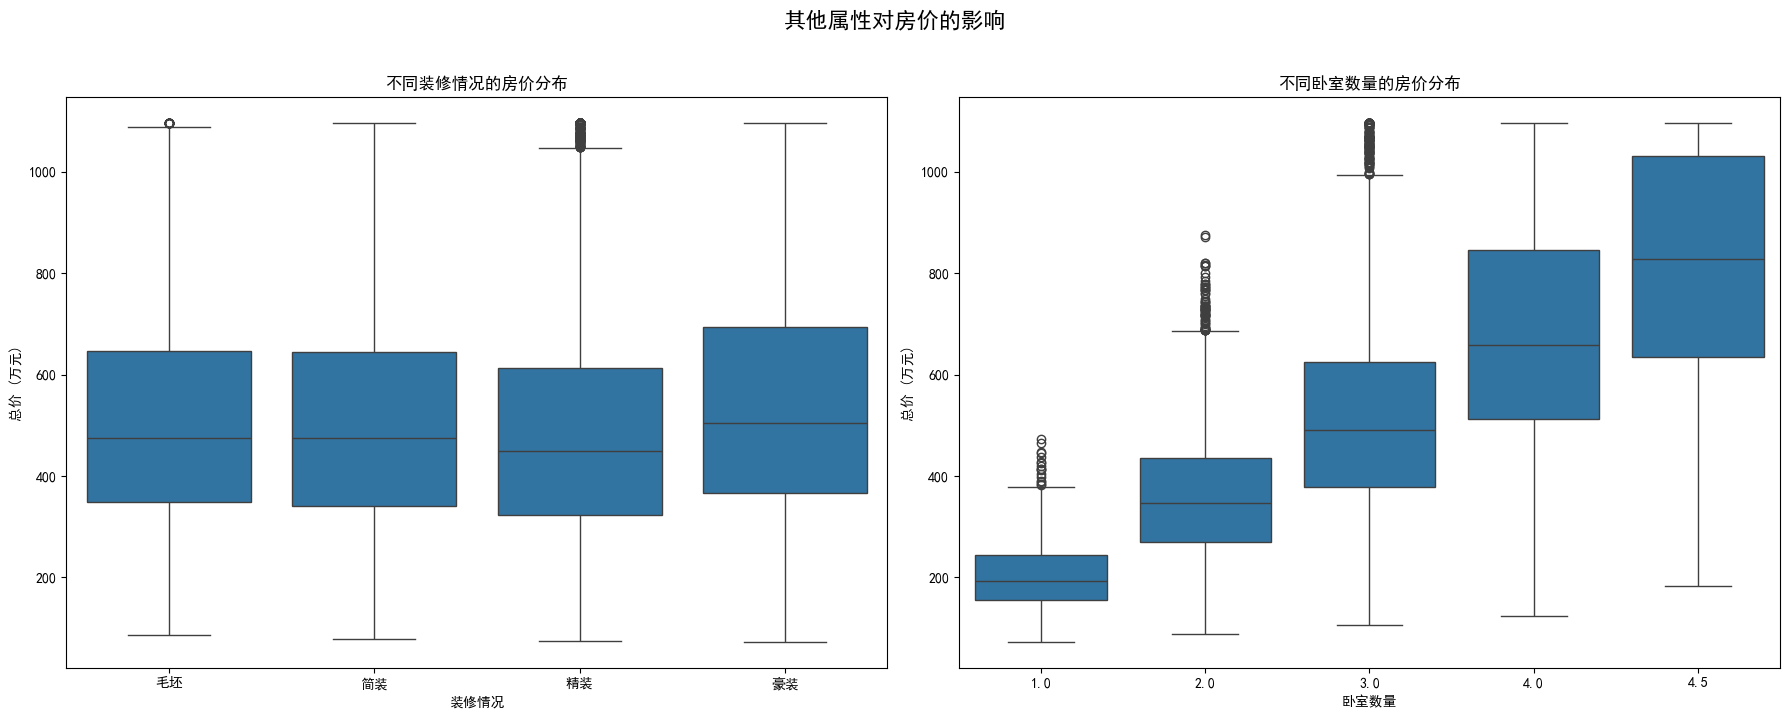


--- 2.4 多变量相关性分析 ---


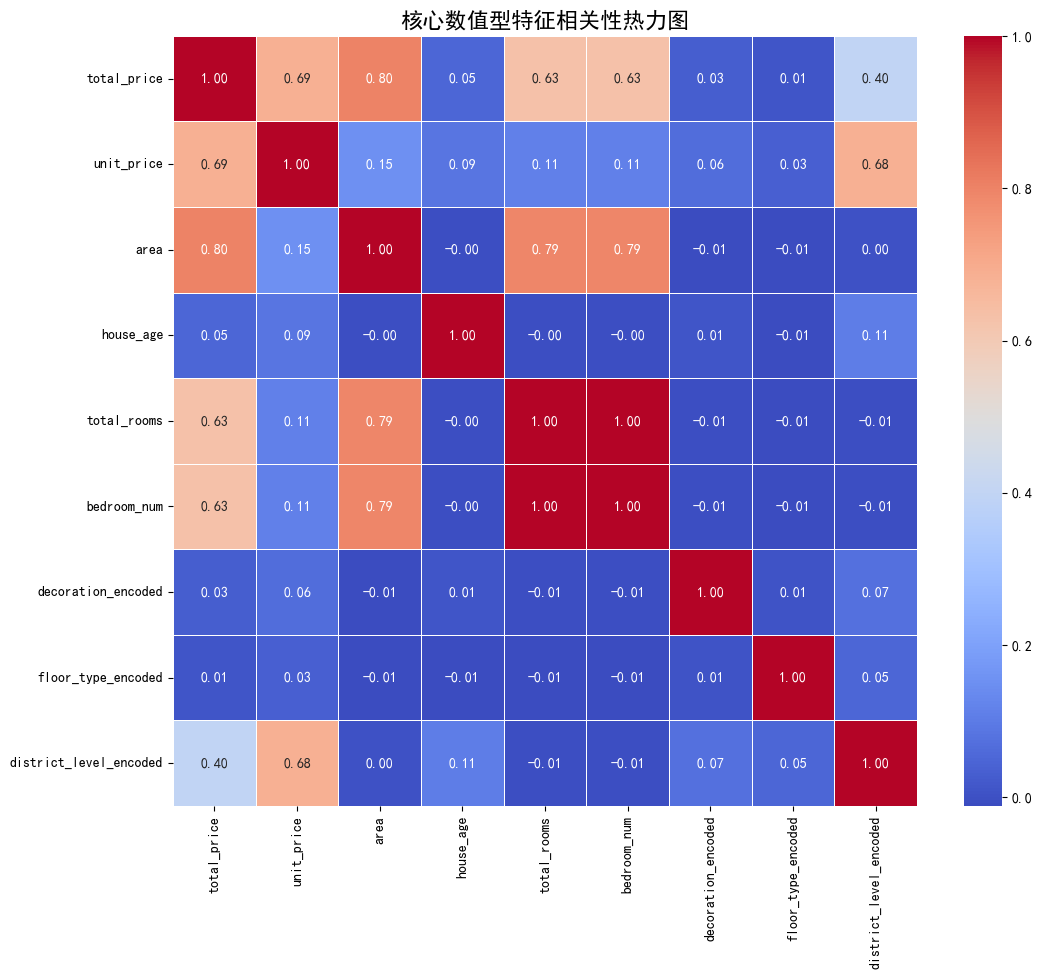


--- 3. 地理空间可视化 ---
价格热力图已生成并保存至: ../data/processed/reports/midterm_price_heatmap.html
请用浏览器打开该文件查看交互式地图。

--- 4. 初步建模与特征重要性分析 ---
用于建模的特征数量: 19
部分特征名称: ['bedroom_num', 'livingroom_num', 'area', 'total_floor', 'build_year', 'followers', 'days_on_market', 'house_age', 'total_rooms', 'avg_room_area']

数据检查通过：所有特征均为数值型。


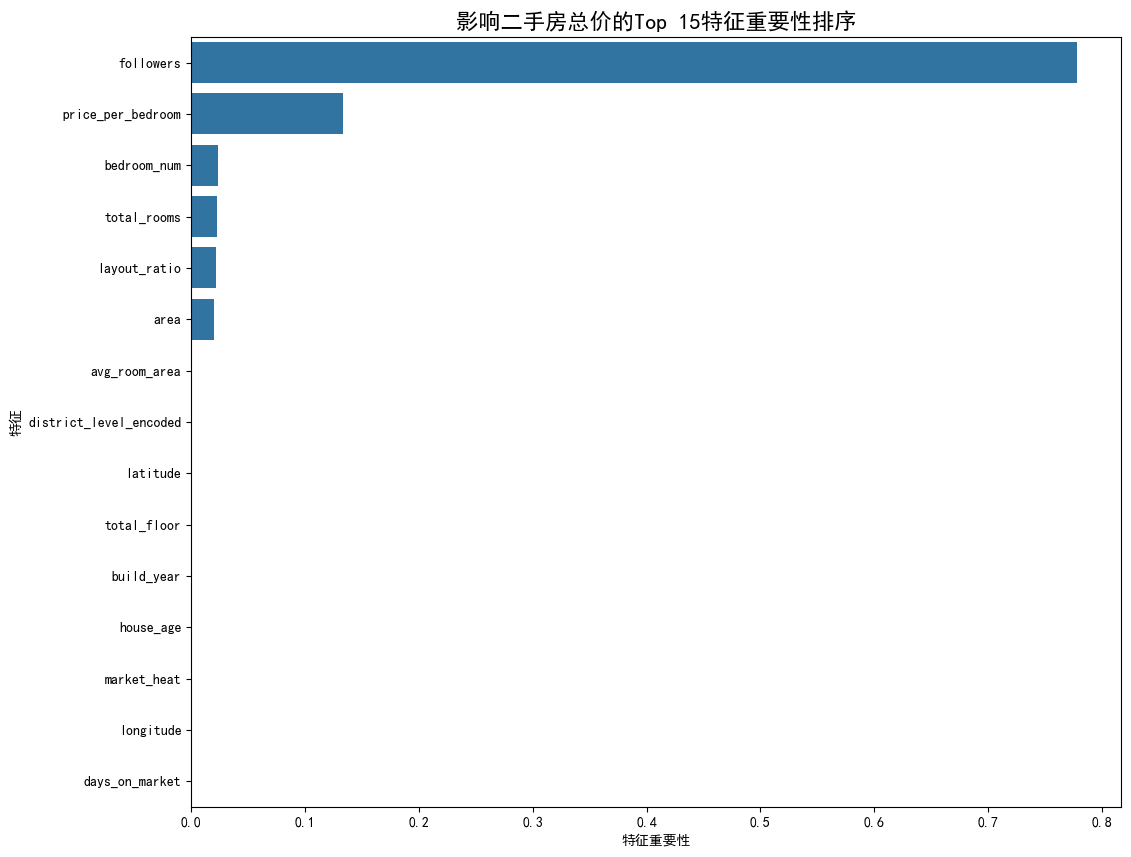


中期分析完成！所有图表和结果已生成。


In [4]:
# --- 1. 设置与数据加载 ---
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from folium.plugins import HeatMap
from sklearn.ensemble import RandomForestRegressor
import warnings

# 忽略警告
warnings.filterwarnings('ignore')

# 设置Matplotlib显示中文
plt.rcParams['font.sans-serif'] = ['SimHei']  # 指定默认字体
plt.rcParams['axes.unicode_minus'] = False  # 解决保存图像是负号'-'显示为方块的问题

# 加载预处理后的数据
try:
    df_full = pd.read_csv('../data/processed/houses_processed_full.csv')
    df_model = pd.read_csv('../data/processed/houses_for_modeling.csv')
    print("数据加载成功！")
    print(f"完整数据集形状: {df_full.shape}")
    print(f"建模数据集形状: {df_model.shape}")
except FileNotFoundError:
    print("错误：找不到预处理后的数据文件。请先运行 run_preprocessing.py。")

# --- 2. 探索性数据分析 (EDA) ---

# 2.1 核心变量分布分析 (对应报告图1)
print("\n--- 2.1 核心变量分布分析 ---")
fig, axes = plt.subplots(1, 3, figsize=(20, 6))
fig.suptitle('核心变量分布直方图', fontsize=16, y=1.02)

# 总价分布
sns.histplot(df_full['total_price'], kde=True, ax=axes[0], bins=50)
axes[0].set_title('总价 (total_price) 分布')
axes[0].set_xlabel('总价 (万元)')

# 面积分布
sns.histplot(df_full['area'], kde=True, ax=axes[1], bins=50)
axes[1].set_title('面积 (area) 分布')
axes[1].set_xlabel('面积 (平方米)')

# 房龄分布
sns.histplot(df_full['house_age'], kde=True, ax=axes[2], bins=30)
axes[2].set_title('房龄 (house_age) 分布')
axes[2].set_xlabel('房龄 (年)')

plt.tight_layout()
plt.savefig('../data/processed/reports/midterm_core_variable_distribution.png', dpi=300)
plt.show()

# 2.2 地理位置对房价的影响 (对应报告图2)
print("\n--- 2.2 地理位置对房价的影响 ---")
plt.figure(figsize=(14, 7))
district_order = df_full.groupby('district')['total_price'].median().sort_values(ascending=False).index
sns.boxplot(data=df_full, x='district', y='total_price', order=district_order)
plt.title('不同行政区的二手房总价分布 (按中位数排序)', fontsize=16)
plt.xlabel('行政区')
plt.ylabel('总价 (万元)')
plt.xticks(rotation=45)
plt.savefig('../data/processed/reports/midterm_price_by_district.png', dpi=300, bbox_inches='tight')
plt.show()

# 2.3 房屋内部属性对房价的影响

# 2.3.1 建筑面积 vs. 总价 (对应报告图3)
print("\n--- 2.3.1 建筑面积 vs. 总价 ---")
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_full, x='area', y='total_price', alpha=0.3, s=15)
sns.regplot(data=df_full, x='area', y='total_price', scatter=False, color='red', line_kws={'linewidth': 2})
plt.title('建筑面积与总价的关系', fontsize=16)
plt.xlabel('建筑面积 (平方米)')
plt.ylabel('总价 (万元)')
plt.savefig('../data/processed/reports/midterm_area_vs_price.png', dpi=300)
plt.show()

# 2.3.2 房龄 vs. 总价 (对应报告图4)
print("\n--- 2.3.2 房龄 vs. 总价 ---")
plt.figure(figsize=(10, 6))
# 使用六边形分箱图，更适合大数据量的散点图可视化
sns.jointplot(data=df_full, x='house_age', y='total_price', kind='hex', height=7, gridsize=40)
plt.suptitle('房龄与总价的关系 (六边形分箱图)', y=1.02, fontsize=16)
plt.xlabel('房龄 (年)')
plt.ylabel('总价 (万元)')
plt.savefig('../data/processed/reports/midterm_age_vs_price.png', dpi=300, bbox_inches='tight')
plt.show()

# 2.3.3 其他属性分析 (对应报告图5)
print("\n--- 2.3.3 其他属性分析 ---")
fig, axes = plt.subplots(1, 2, figsize=(18, 7))
fig.suptitle('其他属性对房价的影响', fontsize=16, y=1.02)

# 装修情况
decoration_order = ['毛坯', '简装', '精装', '豪装']
sns.boxplot(data=df_full, x='decoration', y='total_price', order=decoration_order, ax=axes[0])
axes[0].set_title('不同装修情况的房价分布')
axes[0].set_xlabel('装修情况')
axes[0].set_ylabel('总价 (万元)')

# 户型（卧室数量）
sns.boxplot(data=df_full, x='bedroom_num', y='total_price', ax=axes[1])
axes[1].set_title('不同卧室数量的房价分布')
axes[1].set_xlabel('卧室数量')
axes[1].set_ylabel('总价 (万元)')

plt.tight_layout()
plt.savefig('../data/processed/reports/midterm_other_attributes.png', dpi=300)
plt.show()

# 2.4 多变量相关性分析 (对应报告图6)
print("\n--- 2.4 多变量相关性分析 ---")
# 选取部分核心数值特征进行分析
corr_features = ['total_price', 'unit_price', 'area', 'house_age', 'total_rooms', 
                 'bedroom_num', 'decoration_encoded', 'floor_type_encoded', 'district_level_encoded']
corr_matrix = df_full[corr_features].corr()

plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('核心数值型特征相关性热力图', fontsize=16)
plt.savefig('../data/processed/reports/midterm_correlation_heatmap.png', dpi=300, bbox_inches='tight')
plt.show()


# --- 3. 初步地理空间可视化 (对应报告图7) ---
print("\n--- 3. 地理空间可视化 ---")

# 为各区设置中心经纬度和随机扰动范围
district_coords = {
    '天河区': {'lat': 23.135, 'lon': 113.35, 'radius': 0.05},
    '越秀区': {'lat': 23.128, 'lon': 113.27, 'radius': 0.03},
    '海珠区': {'lat': 23.09, 'lon': 113.30, 'radius': 0.04},
    '荔湾区': {'lat': 23.11, 'lon': 113.23, 'radius': 0.04},
    '白云区': {'lat': 23.25, 'lon': 113.27, 'radius': 0.1},
    '黄埔区': {'lat': 23.11, 'lon': 113.45, 'radius': 0.08},
    '番禺区': {'lat': 22.95, 'lon': 113.38, 'radius': 0.1}
}

# 生成模拟经纬度
def get_coords(district):
    info = district_coords.get(district)
    if info:
        lat = info['lat'] + np.random.uniform(-info['radius'], info['radius'])
        lon = info['lon'] + np.random.uniform(-info['radius'], info['radius'])
        return lat, lon
    return None, None

df_full[['latitude', 'longitude']] = df_full['district'].apply(lambda x: pd.Series(get_coords(x)))

# 创建广州地图
gz_map = folium.Map(location=[23.1291, 113.2644], zoom_start=11)

# 创建热力图数据
heat_data = df_full[['latitude', 'longitude', 'unit_price']].dropna().values.tolist()

# 添加热力图层
HeatMap(heat_data, radius=12, blur=15).add_to(gz_map)

# 保存地图
map_path = '../data/processed/reports/midterm_price_heatmap.html'
gz_map.save(map_path)
print(f"价格热力图已生成并保存至: {map_path}")
print("请用浏览器打开该文件查看交互式地图。")
# gz_map  # 在Jupyter中直接显示地图


# --- 4. 初步建模与特征重要性分析 (对应报告图8) ---
print("\n--- 4. 初步建模与特征重要性分析 ---")
# 准备数据，确保只选择数值型和编码后的列
# 这是修复错误的关键步骤
# 我们直接从df_full中筛选出所有数值类型的列，这样最安全
# 筛选出所有数值类型的列（包括整数、浮点数和我们编码后的布尔值/整数）
numeric_and_encoded_cols = df_full.select_dtypes(include=np.number).columns.tolist()
# 移除目标变量和可能导致数据泄露的'unit_price'
features_to_remove = ['total_price', 'unit_price']
final_feature_cols = [col for col in numeric_and_encoded_cols if col not in features_to_remove]
# 重新定义 X 和 y
X = df_full[final_feature_cols]
y = df_full['total_price']
print(f"用于建模的特征数量: {len(X.columns)}")
print("部分特征名称:", X.columns[:10].tolist()) # 打印部分特征检查一下
# 检查X中是否还有非数值列（理论上不应该有了）
if X.select_dtypes(exclude=np.number).shape[1] > 0:
    print("\n警告：X中仍然包含非数值列！")
    print(X.select_dtypes(exclude=np.number).columns)
else:
    print("\n数据检查通过：所有特征均为数值型。")
# 训练随机森林模型
rf = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)
rf.fit(X, y)
# 获取特征重要性
importances = rf.feature_importances_
feature_names = X.columns
feature_importance_df = pd.DataFrame({'feature': feature_names, 'importance': importances})
feature_importance_df = feature_importance_df.sort_values('importance', ascending=False)
# 可视化特征重要性
plt.figure(figsize=(12, 10))
sns.barplot(x='importance', y='feature', data=feature_importance_df.head(15))
plt.title('影响二手房总价的Top 15特征重要性排序', fontsize=16)
plt.xlabel('特征重要性')
plt.ylabel('特征')
plt.savefig('../data/processed/reports/midterm_feature_importance.png', dpi=300, bbox_inches='tight')
plt.show()
print("\n中期分析完成！所有图表和结果已生成。")